# Documentation

### State index to value mapping

state index | cand gender | cand prod score | emp1 gender | emp1 prod score | emp2 gender | emp2 prod score
--- | --- | --- | --- | --- | --- | ---
0 | F | 0 | - | - | - | -
1 | F | 1 | - | - | - | -
2 | F | 2 | - | - | - | -
3 | M | 0 | - | - | - | -
4 | M | 1 | - | - | - | -
5 | M | 2 | - | - | - | -

# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys

"""
Add gym-hiring directory to current path. I believe this is needed
when referencing a pip "file:///" dependency.
"""
p = os.path.abspath('../')
if p not in sys.path:
    sys.path.insert(0, p)

import logging    
import gym
import gym_hiring
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from experiments.gym_utils import play_n_episodes

logging.getLogger().setLevel(logging.INFO)

# Define Optimal Policy

In [11]:
class OptimalPoliciy:
    
    def __init__(self):
        pass
    
    def select_action(self, obs, eps):
        if obs[1] > 1:
            return 1
        else:
            return 0
    
    def add_experience(self, prev_obs, action, reward, obs, done):
        pass
    
    def train(self, iters):
        pass

# Execute Optimal Policy

In [5]:
args = {'max_steps_per_episode': 10,
        'verbose': True}

env = gym.make('SimpleHiring-v0', **args)
start_obs = env.reset()

INFO:root:SimpleHiring - Version 0.0.1
/Users/jblandin/research/gym-hiring/gym_hiring/envs/simple_hiring.py:117: RuntimeWarning: divide by zero encountered in true_divide
  self.transition_probabilities.sum(axis=2, keepdims=True))
/Users/jblandin/research/gym-hiring/gym_hiring/envs/simple_hiring.py:117: RuntimeWarning: invalid value encountered in true_divide
  self.transition_probabilities.sum(axis=2, keepdims=True))
INFO:root:Episode 0
INFO:root:	F, 1, -, -, -, -
INFO:root:Episode 1
INFO:root:	F, 1, -, -, -, -


INFO:root:Episode 5
INFO:root:	F, 1, -, -, -, -
INFO:root:	F, 0, -, -, -, -
INFO:root:	M, 2, -, -, -, -
INFO:root:	F, 0, M, 2, -, -
INFO:root:	F, 1, M, 2, -, -
INFO:root:	M, 1, M, 2, -, -
INFO:root:	F, 0, M, 2, -, -
INFO:root:	F, 1, M, 2, -, -
INFO:root:	M, 2, M, 2, -, -
INFO:root:	F, 1, M, 2, M, 2
INFO:root:	M, 2, M, 2, M, 2


episode: 0, total reward: 20.00, eps: 0.000, avg reward last 1: 20.000

Total steps: 1
Avg cumulative reward: 20.000
Avg reward for last 1 episodes: 20.000


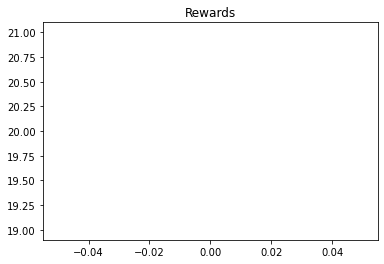

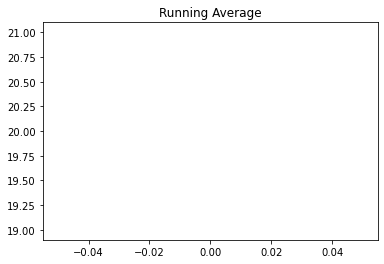

In [12]:
model = OptimalPoliciy()

play_n_episodes(env, model, n=1)

# Use IRL to compute reward function from optimal policy

In [9]:
from experiments.irl.linear_irl import irl

learned_reward = irl(env.n_states, env.n_actions, env.transition_probabilities, model.policy, 0, 4, 0)
learned_reward

Optimal solution found.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Learn new policy using learned reward (Value Iteration)

# Execute new policy

# Evaluate new policy